In [50]:
import sys
sys.path.append('../_amigocloud')

In [105]:
from amigocloud import AmigoCloud
import pandas as pd
from shapely import wkb

import geopandas

from datetime import datetime, timedelta
from shapely import wkb
from shapely.geometry import Polygon, MultiPolygon

In [52]:
# ruta de carpera donde estan las llaves
ruta = open('../ruta.txt')
ruta = ruta.readlines()[0]

In [53]:
# leer token
acceso = open(ruta + '/_keys/api_amigocloud.key','r')
api_token = acceso.readlines()[0]
acceso.close()
amigocloud = AmigoCloud(token=api_token)
amigocloud

In [75]:
def convertir_wkb(wkb_data):
    geom = wkb.loads(wkb_data, hex=True)
    # Si la geometría es un MultiPolygon con un solo polígono, conviértelo a Polígono
    if isinstance(geom, MultiPolygon) and len(geom.geoms) == 1:
        geom = geom.geoms[0]
    return geom

In [54]:
semana = 19

In [55]:
query = f"select cast(split_part(insp.semana_3ra, 'S', 2) as integer) sem_reg, cast(split_part(prop.propiedad, ' / ', 1) as integer) unidad_01, split_part(prop.propiedad, ' / ', 2) unidad_02, cast(split_part(insp.canhero, ' / ', 1) as integer) unidad_03, split_part(insp.canhero, ' / ',2) unidad_04, lote.lote unidad_05, lote.superficie area, lote.fecha_siembra::date fecha_inicio, 'SIEMBRA 2024' origen, lote.geometria from dataset_307560 insp inner join dataset_307562 prop on insp.amigo_id = prop.insp_ref_prop inner join dataset_307563 lote on prop.amigo_id = lote.prop_ref_lote where insp.estado_3ra_insp = 'APROBADO' and cast(split_part(insp.semana_3ra, 'S', 2) as integer) = {semana}"

In [56]:
query

"select cast(split_part(insp.semana_3ra, 'S', 2) as integer) sem_reg, cast(split_part(prop.propiedad, ' / ', 1) as integer) unidad_01, split_part(prop.propiedad, ' / ', 2) unidad_02, cast(split_part(insp.canhero, ' / ', 1) as integer) unidad_03, split_part(insp.canhero, ' / ',2) unidad_04, lote.lote unidad_05, lote.superficie area, lote.fecha_siembra::date fecha_inicio, 'SIEMBRA 2024' origen, lote.geometria from dataset_307560 insp inner join dataset_307562 prop on insp.amigo_id = prop.insp_ref_prop inner join dataset_307563 lote on prop.amigo_id = lote.prop_ref_lote where insp.estado_3ra_insp = 'APROBADO' and cast(split_part(insp.semana_3ra, 'S', 2) as integer) = 19"

In [72]:
query_consulta = {'query': query}
select = amigocloud.get('https://app.amigocloud.com/api/v1/projects/32672/sql', query_consulta)
data = select['data']

In [73]:
df = pd.DataFrame(data)

In [76]:
df

,sem_reg,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,fecha_inicio,origen,geometria
0,19,2013,LA ASUNTA--CRONEMBOLD,2641,CRONENBOLD AGUILERA ROBERTO,L7,4.96,2024-04-10,SIEMBRA 2024,0106000020E6100000010000000103000000010000000D...
1,19,1520,VILLA COPACABANA - CRONENBOLD,2641,CRONENBOLD AGUILERA ROBERTO,L35,3.18,2024-04-30,SIEMBRA 2024,0106000020E61000000100000001030000000100000014...
2,19,1520,VILLA COPACABANA - CRONENBOLD,2641,CRONENBOLD AGUILERA ROBERTO,L33.1,1.13,2024-03-25,SIEMBRA 2024,0106000020E61000000100000001030000000100000011...
3,19,63,SAN MARIANITO--CRONEMBOLD AGUILERA,2641,CRONENBOLD AGUILERA ROBERTO,L30.1,8.38,2024-03-13,SIEMBRA 2024,0106000020E61000000100000001030000000100000007...
4,19,1520,VILLA COPACABANA - CRONENBOLD,2641,CRONENBOLD AGUILERA ROBERTO,L32,0.97,2024-03-25,SIEMBRA 2024,0106000020E61000000100000001030000000100000007...
5,19,2013,LA ASUNTA--CRONEMBOLD,2641,CRONENBOLD AGUILERA ROBERTO,L5.1,2.19,2024-04-10,SIEMBRA 2024,0106000020E6100000010000000103000000010000000F...
6,19,1520,VILLA COPACABANA - CRONENBOLD,2641,CRONENBOLD AGUILERA ROBERTO,L20,13.35,2024-04-15,SIEMBRA 2024,0106000020E61000000100000001030000000100000010...
7,19,1520,VILLA COPACABANA - CRONENBOLD,2641,CRONENBOLD AGUILERA ROBERTO,L32.1,1.67,2024-03-25,SIEMBRA 2024,0106000020E6100000010000000103000000010000000F...
8,19,1520,VILLA COPACABANA - CRONENBOLD,2641,CRONENBOLD AGUILERA ROBERTO,L33.3,1.36,2024-03-25,SIEMBRA 2024,0106000020E6100000010000000103000000010000000F...
9,19,1520,VILLA COPACABANA - CRONENBOLD,2641,CRONENBOLD AGUILERA ROBERTO,L32.3,0.36,2024-03-25,SIEMBRA 2024,0106000020E61000000100000001030000000100000012...


In [79]:
df['geometria'] = df['geometria'].apply(convertir_wkb)

In [80]:
df

,sem_reg,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,fecha_inicio,origen,geometria
0,19,2013,LA ASUNTA--CRONEMBOLD,2641,CRONENBOLD AGUILERA ROBERTO,L7,4.96,2024-04-10,SIEMBRA 2024,POLYGON ((-63.26304781422493 -17.2414319478294...
1,19,1520,VILLA COPACABANA - CRONENBOLD,2641,CRONENBOLD AGUILERA ROBERTO,L35,3.18,2024-04-30,SIEMBRA 2024,POLYGON ((-63.249952901975576 -17.392875054832...
2,19,1520,VILLA COPACABANA - CRONENBOLD,2641,CRONENBOLD AGUILERA ROBERTO,L33.1,1.13,2024-03-25,SIEMBRA 2024,"POLYGON ((-63.2512746247044 -17.3989549407605,..."
3,19,63,SAN MARIANITO--CRONEMBOLD AGUILERA,2641,CRONENBOLD AGUILERA ROBERTO,L30.1,8.38,2024-03-13,SIEMBRA 2024,"POLYGON ((-63.1824786056791 -17.3759743898016,..."
4,19,1520,VILLA COPACABANA - CRONENBOLD,2641,CRONENBOLD AGUILERA ROBERTO,L32,0.97,2024-03-25,SIEMBRA 2024,POLYGON ((-63.250657406041356 -17.402040240161...
5,19,2013,LA ASUNTA--CRONEMBOLD,2641,CRONENBOLD AGUILERA ROBERTO,L5.1,2.19,2024-04-10,SIEMBRA 2024,POLYGON ((-63.25471125706936 -17.2415590170637...
6,19,1520,VILLA COPACABANA - CRONENBOLD,2641,CRONENBOLD AGUILERA ROBERTO,L20,13.35,2024-04-15,SIEMBRA 2024,POLYGON ((-63.272549356889876 -17.409705816342...
7,19,1520,VILLA COPACABANA - CRONENBOLD,2641,CRONENBOLD AGUILERA ROBERTO,L32.1,1.67,2024-03-25,SIEMBRA 2024,POLYGON ((-63.250482879889304 -17.401417843960...
8,19,1520,VILLA COPACABANA - CRONENBOLD,2641,CRONENBOLD AGUILERA ROBERTO,L33.3,1.36,2024-03-25,SIEMBRA 2024,POLYGON ((-63.24956854378418 -17.3977718348609...
9,19,1520,VILLA COPACABANA - CRONENBOLD,2641,CRONENBOLD AGUILERA ROBERTO,L32.3,0.36,2024-03-25,SIEMBRA 2024,POLYGON ((-63.24869626978379 -17.4007619612806...


In [89]:
data = geopandas.GeoDataFrame(df, geometry='geometria', crs='EPSG:4326')

<Axes: >

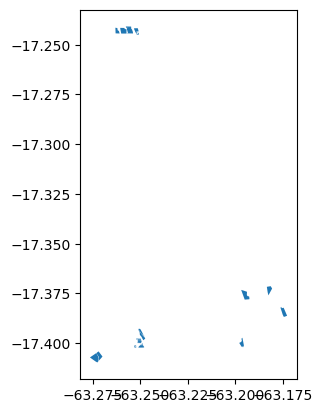

In [90]:
data.plot()

In [91]:
gdf_utm = data.to_crs('EPSG:32720')

In [98]:
gdf_utm['fecha_inicio'] = pd.to_datetime(gdf_utm['fecha_inicio'])

In [100]:
gdf_utm.dtypes

sem_reg                  int64
unidad_01                int64
unidad_02               object
unidad_03                int64
unidad_04               object
unidad_05               object
area                   float64
fecha_inicio    datetime64[ns]
origen                  object
geometria             geometry
dtype: object

In [106]:
now = datetime.now()

In [110]:
gdf_utm['dias'] = (now - gdf_utm['fecha_inicio']).dt.days

In [113]:
gdf_utm

,sem_reg,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,fecha_inicio,origen,geometria,dias
0,19,2013,LA ASUNTA--CRONEMBOLD,2641,CRONENBOLD AGUILERA ROBERTO,L7,4.96,2024-04-10,SIEMBRA 2024,"POLYGON ((472036.356 8093717.214, 472143.866 8...",54
1,19,1520,VILLA COPACABANA - CRONENBOLD,2641,CRONENBOLD AGUILERA ROBERTO,L35,3.18,2024-04-30,SIEMBRA 2024,"POLYGON ((473450.191 8076965.012, 473370.770 8...",34
2,19,1520,VILLA COPACABANA - CRONENBOLD,2641,CRONENBOLD AGUILERA ROBERTO,L33.1,1.13,2024-03-25,SIEMBRA 2024,"POLYGON ((473310.680 8076292.209, 473312.165 8...",70
3,19,63,SAN MARIANITO--CRONEMBOLD AGUILERA,2641,CRONENBOLD AGUILERA ROBERTO,L30.1,8.38,2024-03-13,SIEMBRA 2024,"POLYGON ((480615.505 8078842.811, 480822.643 8...",82
4,19,1520,VILLA COPACABANA - CRONENBOLD,2641,CRONENBOLD AGUILERA ROBERTO,L32,0.97,2024-03-25,SIEMBRA 2024,"POLYGON ((473376.685 8075950.967, 473352.335 8...",70
5,19,2013,LA ASUNTA--CRONEMBOLD,2641,CRONENBOLD AGUILERA ROBERTO,L5.1,2.19,2024-04-10,SIEMBRA 2024,"POLYGON ((472922.608 8093704.343, 472703.635 8...",54
6,19,1520,VILLA COPACABANA - CRONENBOLD,2641,CRONENBOLD AGUILERA ROBERTO,L20,13.35,2024-04-15,SIEMBRA 2024,"POLYGON ((471052.647 8075099.746, 471126.539 8...",49
7,19,1520,VILLA COPACABANA - CRONENBOLD,2641,CRONENBOLD AGUILERA ROBERTO,L32.1,1.67,2024-03-25,SIEMBRA 2024,"POLYGON ((473395.132 8076019.847, 473390.329 8...",70
8,19,1520,VILLA COPACABANA - CRONENBOLD,2641,CRONENBOLD AGUILERA ROBERTO,L33.3,1.36,2024-03-25,SIEMBRA 2024,"POLYGON ((473491.723 8076423.333, 473492.612 8...",70
9,19,1520,VILLA COPACABANA - CRONENBOLD,2641,CRONENBOLD AGUILERA ROBERTO,L32.3,0.36,2024-03-25,SIEMBRA 2024,"POLYGON ((473584.803 8076092.655, 473477.343 8...",70
